In [1]:
# from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv("./Training Data/Linear_X_Train.csv")
Y=pd.read_csv("./Training Data/Linear_Y_Train.csv")
X.shape,Y.shape

((3750, 1), (3750, 1))

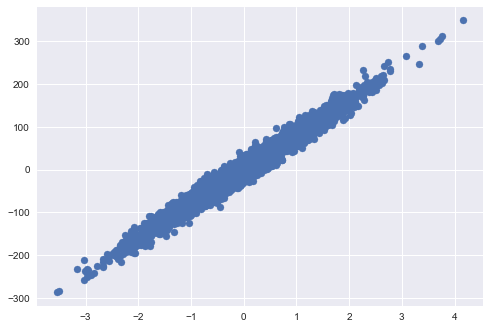

In [3]:
# Convert pd to np
X=X.values
Y=Y.values
# Normalize
u=X.mean()
std=X.std()
X=(X-u)/std

# Visualize
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()



In [21]:
def hypothesis(x, theta):
    y_=theta[0] + x*theta[1]
    return y_

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y_=hypothesis(x, theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*x
    
    return grad/m

def error(X,Y,theta):
    total_error=0.0
    m=X.shape[0]
    for i in range(m):
        y_=hypothesis(X[i], theta)
        total_error+=(y_-Y[i])**2
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    for i in range(max_steps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        
    return theta,error_list,theta_list  
    

In [22]:
theta,error_list,theta_list=gradientDescent(X,Y)
theta

array([ 0.6838508 , 79.90361453])

In [23]:
error_list,theta_list

([array([6576.35005246]),
  array([5363.12510257]),
  array([4380.41289317]),
  array([3584.41600355]),
  array([2939.65852295]),
  array([2417.40496367]),
  array([1994.37958066]),
  array([1651.72902041]),
  array([1374.18206661]),
  array([1149.36903404]),
  array([967.27047765]),
  array([819.77064698]),
  array([700.29578413]),
  array([603.52114523]),
  array([525.13368772]),
  array([461.63984713]),
  array([410.20983626]),
  array([368.55152745]),
  array([334.80829731]),
  array([307.47628091]),
  array([285.33734761]),
  array([267.40481165]),
  array([252.87945752]),
  array([241.11392067]),
  array([231.58383582]),
  array([223.8644671]),
  array([217.61177843]),
  array([212.54710061]),
  array([208.44471157]),
  array([205.12177646]),
  array([202.43019901]),
  array([200.25002128]),
  array([198.48407732]),
  array([197.05366271]),
  array([195.89502687]),
  array([194.95653185]),
  array([194.19635088]),
  array([193.58060429]),
  array([193.08184956]),
  array([192.677

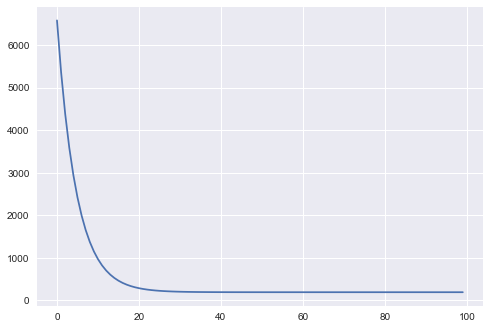

In [7]:
plt.plot(error_list)

plt.show()

In [8]:
y_=hypothesis(X, theta)
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

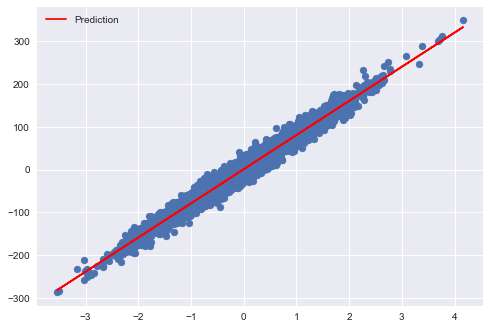

In [9]:
plt.scatter(X,Y)
plt.plot(X,y_,color='red',label='Prediction')
plt.legend()
plt.show()

In [10]:
X_test=pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test=hypothesis(X_test, theta)
y_test

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [11]:
df=pd.DataFrame(data=y_test,columns=['y'])

In [12]:
df.to_csv("y_prediction.csv",index=False)

# Additional Content to visualise to Loss function , Theta

In [13]:
theta

array([ 0.6838508 , 79.90361453])

In [25]:
T0=np.arange(-40,40)
T1=np.arange(40,120)

T0,T1=np.meshgrid(T0,T1)

J=np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        
        y_=T1[i,j]*X+T0[i,j]
        J[i,j]=np.sum((Y-y_)**2)/Y.shape[0]
        


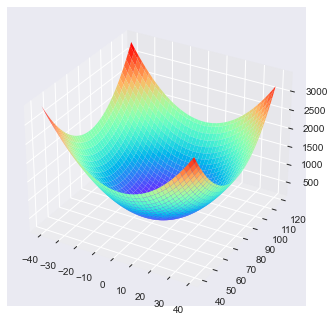

In [26]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

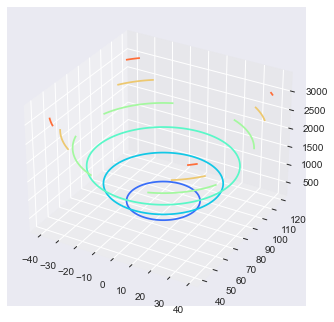

In [27]:
# contour plot

fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

In [28]:
## Theta Plot

theta_list=np.array(theta_list)

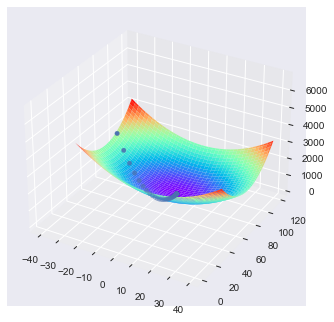

In [32]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

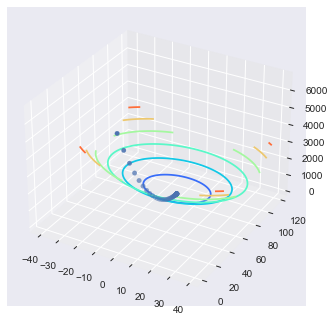

In [33]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

In [34]:
# save data in a file

In [35]:
np.save("ThetaList.npy",theta_list)